# **Problem Set 4**

## Q1. Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)

The dataset I have chosen is the "Marketing Campaign" dataset from Kaggle. It provides an interesting marketing problem, which is to predict whether a customer will respond to a marketing campaign and make a purchase or not. The dataset includes features such as age, income, education, marital status, etc along with the response variable, which is whether the customer responded to the marketing campaign or not. There are 2240 rows and 29 columns in this dataset.

I chose this dataset becauase it provides a good opportunity to explore and apply different machine learning techniques for classification problems, such as decision trees, random forests, and gradient boosting. Additionally, the dataset includes a mix of categorical and numerical features, which adds another layer of complexity to the analysis.

This dataset is from an unknown year and was collected using an unknown methodology. As you read this write-up, it's important to note that while this dataset provides an interesting marketing problem, it's unclear how it was collected and the variables may not be representative of the larger population. Additionally, the dataset does not have a large sample size, which may limit the generalizability of any findings.

## Q2. Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)

Research Question: With this dataset, my aim is to try and predict whether a customer will respond positively to a marketing campaign based on various features such as their demographics and behavioral attributes. Along with this, I wish to understand which features are most important for a successful campaign.

Since this response variable can take only 2 values (0 and 1), this problem is a classification problem. In this assignment, I will develop and train a decision tree model which will make the above prediction. I have made certain variations in my model's parameters as I progress, to determine which parameters are the most suitable for the aforementioned problem set. 

The ultimate use of this analysis would be to identify the most effective marketing strategies for a given target audience, in order to optimize the success of future campaigns. Although, we don't have information on the marketing campaigns, the features AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2 indicates which marketing strategy/strategies was effective on which customer. 

## Q3. Why is this algorithm a good way of answering your research question?

Decision tree is a good algorithm for answering this question because it can easily handle both categorical and numerical data, which are present in the marketing campaign dataset. Additionally, decision trees are easy to interpret and explain, which is important when analyzing marketing campaigns. Decision tree also has the ability to identify important features that contribute most to the target variable, which can be helpful in identifying key factors that influence the success of a marketing campaign.

## Q4. Using the data you chose and the algorithm you chose, read in your data and run your model.

## Q5. Tinker with parameters at least 3 times

## Q6. Report the accuracy of your model.

### Importing libraries and loading the dataset

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [112]:
# Loading dataset
marketing_campaign_df = pd.read_csv("marketing_campaign.csv", sep='\t')

### Perform Exploratory Data Analysis

In [113]:
marketing_campaign_df['Age'] = 2023 - marketing_campaign_df['Year_Birth']

In [114]:
marketing_campaign_df.head(5) 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42


In [115]:
marketing_campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [116]:
marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [117]:
#Checking for null values
marketing_campaign_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [118]:
#Removing null values from the dataset
#filter = marketing_campaign_df.loc[marketing_campaign_df['Marital_Status']==Null]
#filter
marketing_campaign_df[pd.isnull(marketing_campaign_df).any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,0,3,11,0,40
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,0,3,11,0,37
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,0,3,11,0,64
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,0,3,11,0,72
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,0,3,11,0,41
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,0,3,11,0,50
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,0,3,11,0,66
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,0,3,11,0,66
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,0,3,11,0,50
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,0,3,11,0,62


In [119]:
# Since income is an important feature in customer segmentation 
# some customers spend more or prefer luxurious products because their income is high and they can afford it 
# I will be deleting all rows having null values

marketing_campaign_df = marketing_campaign_df.dropna()

#Checking for null values
marketing_campaign_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [120]:
# As we can see, there is major imbalance in our dataset which can affect the accuracy of our results. Thus, we will have to take this into consideration when developing a ML model. 
marketing_campaign_df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

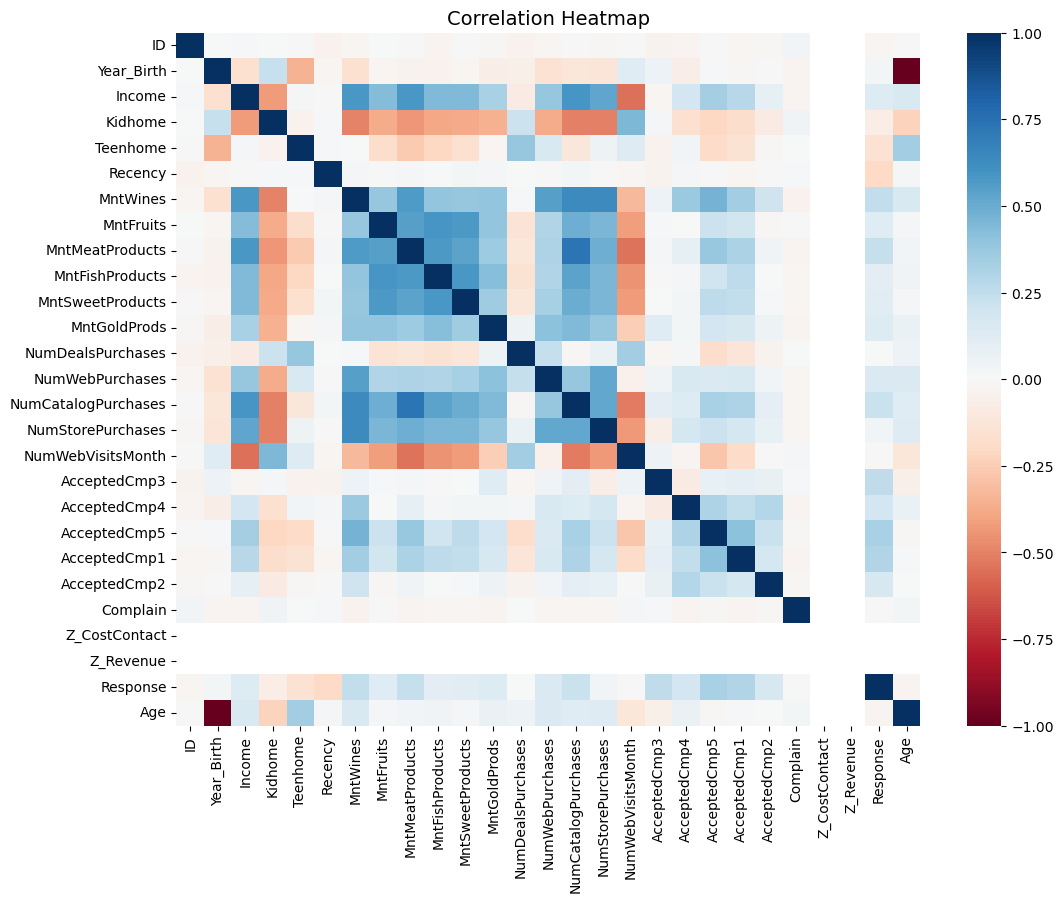

In [121]:
#Checking correlation between variables
plt.figure(figsize=(12,9))
sns.heatmap(marketing_campaign_df.corr(),cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [122]:
# get_dummies function to one-hot encode categorical variables
marketing_campaign_df = pd.get_dummies(marketing_campaign_df) 

### Perform Decision Tree

In [123]:
#Split dataset in features and target variable
X = marketing_campaign_df.drop(['Response'], axis=1)
y = marketing_campaign_df.Response

#feature_cols = marketing_campaign_df.drop(['Response'], axis=1)
#X = feature_cols # Features
#y = marketing_campaign_df['Response'] # Target variable

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create Decision Tree classifer object
clf_default = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_default = clf_default.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_default = clf_default.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_default))
accuracy_default = metrics.accuracy_score(y_test, y_pred_default)*100
print("Accuracy:", accuracy_default)
cm_default = confusion_matrix(y_test,y_pred_default)
print(cm_default)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       385
           1       0.44      0.47      0.46        59

    accuracy                           0.85       444
   macro avg       0.68      0.69      0.69       444
weighted avg       0.86      0.85      0.85       444

Accuracy: 85.13513513513513
[[350  35]
 [ 31  28]]


In [124]:
'''
# Visualizing the decision tree
feature_names = marketing_campaign_df.columns[2:28]
target_names = marketing_campaign_df['Response']

fig1 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_default,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)
'''

"\n# Visualizing the decision tree\nfeature_names = marketing_campaign_df.columns[2:28]\ntarget_names = marketing_campaign_df['Response']\n\nfig1 = plt.figure(figsize=(25,20))\nplottree = tree.plot_tree(clf_default,\n                           feature_names=X.columns.tolist(),\n                           class_names=str(target_names),\n                           filled=True, \n                           rounded=True, \n                           fontsize=14)\n"

In [125]:
'''
# Feature importance 
feat_dict_default= {}
for col, val in sorted(zip(X_train.columns, clf_default.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_default[col]=val

feat_df_default = pd.DataFrame({'Feature':feat_dict_default.keys(),'Importance':feat_dict_default.values()})

top_10_feat_default = feat_df_default.head(10)


values_default = top_10_feat_default.Importance    
idx_default = top_10_feat_default.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_default)) else 'red' for x in values_default ]
sns.barplot(y=idx_default,x=values_default,palette=clrs).set(title='10 most important features to predict customer Churn')
plt.show()
'''


"\n# Feature importance \nfeat_dict_default= {}\nfor col, val in sorted(zip(X_train.columns, clf_default.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_default[col]=val\n\nfeat_df_default = pd.DataFrame({'Feature':feat_dict_default.keys(),'Importance':feat_dict_default.values()})\n\ntop_10_feat_default = feat_df_default.head(10)\n\n\nvalues_default = top_10_feat_default.Importance    \nidx_default = top_10_feat_default.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_default)) else 'red' for x in values_default ]\nsns.barplot(y=idx_default,x=values_default,palette=clrs).set(title='10 most important features to predict customer Churn')\nplt.show()\n"

### Tinker with Parameters

#### Changing class weight parameter of decision tree

In [126]:
# Create Decision Tree classifer object
clf_cw = DecisionTreeClassifier(class_weight = 'balanced')

# Train Decision Tree Classifer
clf_cw = clf_cw.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_cw = clf_cw.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_cw))
accuracy_cw = metrics.accuracy_score(y_test, y_pred_cw)*100
print("Accuracy:",accuracy_cw)
cm_cw=confusion_matrix(y_test,y_pred_cw)
print(cm_cw)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       385
           1       0.39      0.44      0.42        59

    accuracy                           0.84       444
   macro avg       0.65      0.67      0.66       444
weighted avg       0.84      0.84      0.84       444

Accuracy: 83.55855855855856
[[345  40]
 [ 33  26]]


In [127]:
'''
# Feature importance 
feat_dict_cw= {}
for col, val in sorted(zip(X_train.columns, clf_cw.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_cw[col]=val

feat_df_cw = pd.DataFrame({'Feature':feat_dict_cw.keys(),'Importance':feat_dict_cw.values()})

top_10_feat_cw = feat_df_cw.head(10)


values_cw = top_10_feat_cw.Importance    
idx_cw = top_10_feat_cw.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]
sns.barplot(y=idx_cw,x=values_cw,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()
'''

"\n# Feature importance \nfeat_dict_cw= {}\nfor col, val in sorted(zip(X_train.columns, clf_cw.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_cw[col]=val\n\nfeat_df_cw = pd.DataFrame({'Feature':feat_dict_cw.keys(),'Importance':feat_dict_cw.values()})\n\ntop_10_feat_cw = feat_df_cw.head(10)\n\n\nvalues_cw = top_10_feat_cw.Importance    \nidx_cw = top_10_feat_cw.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]\nsns.barplot(y=idx_cw,x=values_cw,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')\nplt.show()\n"

In [128]:
'''
# Visualizing the decsion tree
fig2 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_cw,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)
'''

'\n# Visualizing the decsion tree\nfig2 = plt.figure(figsize=(25,20))\nplottree = tree.plot_tree(clf_cw,\n                           feature_names=X.columns.tolist(),\n                           class_names=str(target_names),\n                           filled=True, \n                           rounded=True, \n                           fontsize=14)\n'

#### Changing max depth of the decision tree

In [129]:
# Create Decision Tree classifer object
clf_md = DecisionTreeClassifier(max_depth = 20)

# Train Decision Tree Classifer
clf_md = clf_md.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_md = clf_md.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_md))
accuracy_md = metrics.accuracy_score(y_test, y_pred_md)*100
print("Accuracy:",accuracy_md)
cm_md=confusion_matrix(y_test,y_pred_md)
print(cm_md)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       385
           1       0.52      0.47      0.50        59

    accuracy                           0.87       444
   macro avg       0.72      0.70      0.71       444
weighted avg       0.87      0.87      0.87       444

Accuracy: 87.16216216216216
[[359  26]
 [ 31  28]]


In [130]:
'''

# Feature importance 
feat_dict_md= {}
for col, val in sorted(zip(X_train.columns, clf_md.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_md[col]=val

feat_df_md = pd.DataFrame({'Feature':feat_dict_md.keys(),'Importance':feat_dict_md.values()})

top_10_feat_md = feat_df_md.head(10)


values_md = top_10_feat_md.Importance    
idx_md = top_10_feat_md.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]
sns.barplot(y=idx_md,x=values_md,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()
'''

"\n\n# Feature importance \nfeat_dict_md= {}\nfor col, val in sorted(zip(X_train.columns, clf_md.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_md[col]=val\n\nfeat_df_md = pd.DataFrame({'Feature':feat_dict_md.keys(),'Importance':feat_dict_md.values()})\n\ntop_10_feat_md = feat_df_md.head(10)\n\n\nvalues_md = top_10_feat_md.Importance    \nidx_md = top_10_feat_md.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]\nsns.barplot(y=idx_md,x=values_md,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')\nplt.show()\n"

In [131]:
'''
# Visualizing the decision tree
fig3 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_md,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)
'''

'\n# Visualizing the decision tree\nfig3 = plt.figure(figsize=(25,20))\nplottree = tree.plot_tree(clf_md,\n                           feature_names=X.columns.tolist(),\n                           class_names=str(target_names),\n                           filled=True, \n                           rounded=True, \n                           fontsize=14)\n'

#### Changing Splitter parameter of decision tree

In [132]:
# Create Decision Tree classifer object
clf_s = DecisionTreeClassifier(splitter = "random")

# Train Decision Tree Classifer
clf_s = clf_s.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_s = clf_s.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_s))
accuracy_s = metrics.accuracy_score(y_test, y_pred_s)*100
print("Accuracy:",accuracy_s)
cm_s=confusion_matrix(y_test,y_pred_s)
print(cm_s)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       385
           1       0.46      0.36      0.40        59

    accuracy                           0.86       444
   macro avg       0.68      0.65      0.66       444
weighted avg       0.84      0.86      0.85       444

Accuracy: 85.8108108108108
[[360  25]
 [ 38  21]]


In [133]:
'''
# Feature importance 
feat_dict_s= {}
for col, val in sorted(zip(X_train.columns, clf_s.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_s[col]=val

feat_df_s = pd.DataFrame({'Feature':feat_dict_s.keys(),'Importance':feat_dict_s.values()})

top_10_feat_s = feat_df_s.head(10)


values_s = top_10_feat_s.Importance    
idx_s = top_10_feat_s.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]
sns.barplot(y=idx_s,x=values_s,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()
'''

"\n# Feature importance \nfeat_dict_s= {}\nfor col, val in sorted(zip(X_train.columns, clf_s.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_s[col]=val\n\nfeat_df_s = pd.DataFrame({'Feature':feat_dict_s.keys(),'Importance':feat_dict_s.values()})\n\ntop_10_feat_s = feat_df_s.head(10)\n\n\nvalues_s = top_10_feat_s.Importance    \nidx_s = top_10_feat_s.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]\nsns.barplot(y=idx_s,x=values_s,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')\nplt.show()\n"

In [134]:
'''
# Visualizing the decsiion tree
figs = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_s,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)
'''

'\n# Visualizing the decsiion tree\nfigs = plt.figure(figsize=(25,20))\nplottree = tree.plot_tree(clf_s,\n                           feature_names=X.columns.tolist(),\n                           class_names=str(target_names),\n                           filled=True, \n                           rounded=True, \n                           fontsize=14)\n'

### Improving the decision tree model using ensemble methods

#### Random Forest

In [135]:
# Initialize and train random forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Evaluate performance on test set
accuracy_rf = clf_rf.score(X_test, y_test)*100
print("Accuracy:", accuracy_rf)

Accuracy: 87.83783783783784


In [136]:
'''
# Feature importance 
feat_dict_rf= {}
for col, val in sorted(zip(X_train.columns, clf_rf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_rf[col]=val

feat_df_rf = pd.DataFrame({'Feature':feat_dict_rf.keys(),'Importance':feat_dict_rf.values()})

top_10_feat_rf = feat_df_rf.head(10)


values_rf = top_10_feat_rf.Importance    
idx_rf = top_10_feat_rf.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]
sns.barplot(y=idx_rf,x=values_rf,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()
'''

"\n# Feature importance \nfeat_dict_rf= {}\nfor col, val in sorted(zip(X_train.columns, clf_rf.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_rf[col]=val\n\nfeat_df_rf = pd.DataFrame({'Feature':feat_dict_rf.keys(),'Importance':feat_dict_rf.values()})\n\ntop_10_feat_rf = feat_df_rf.head(10)\n\n\nvalues_rf = top_10_feat_rf.Importance    \nidx_rf = top_10_feat_rf.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]\nsns.barplot(y=idx_rf,x=values_rf,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')\nplt.show()\n"

#### Gradient Boosting

In [137]:
# create Gradient Boosting classifier model
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# train the model on training data
clf_gb.fit(X_train, y_train)

# predict on test data
y_pred_gb = clf_gb.predict(X_test)

# evaluate the model's accuracy
accuracy_gb = clf_gb.score(X_test, y_test)*100
print("Accuracy:", accuracy_gb)

Accuracy: 89.86486486486487


In [138]:
'''
# Feature importance 
feat_dict_gb= {}
for col, val in sorted(zip(X_train.columns, clf_gb.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_gb[col]=val

feat_df_gb = pd.DataFrame({'Feature':feat_dict_gb.keys(),'Importance':feat_dict_gb.values()})

top_10_feat_gb = feat_df_gb.head(10)


values_gb = top_10_feat_gb.Importance    
idx_gb = top_10_feat_gb.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]
sns.barplot(y=idx_gb,x=values_gb,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()
'''

"\n# Feature importance \nfeat_dict_gb= {}\nfor col, val in sorted(zip(X_train.columns, clf_gb.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict_gb[col]=val\n\nfeat_df_gb = pd.DataFrame({'Feature':feat_dict_gb.keys(),'Importance':feat_dict_gb.values()})\n\ntop_10_feat_gb = feat_df_gb.head(10)\n\n\nvalues_gb = top_10_feat_gb.Importance    \nidx_gb = top_10_feat_gb.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values_cw)) else 'red' for x in values_default ]\nsns.barplot(y=idx_gb,x=values_gb,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')\nplt.show()\n"

## Q7. Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization.

Text(0, 0.5, 'Accuracy')

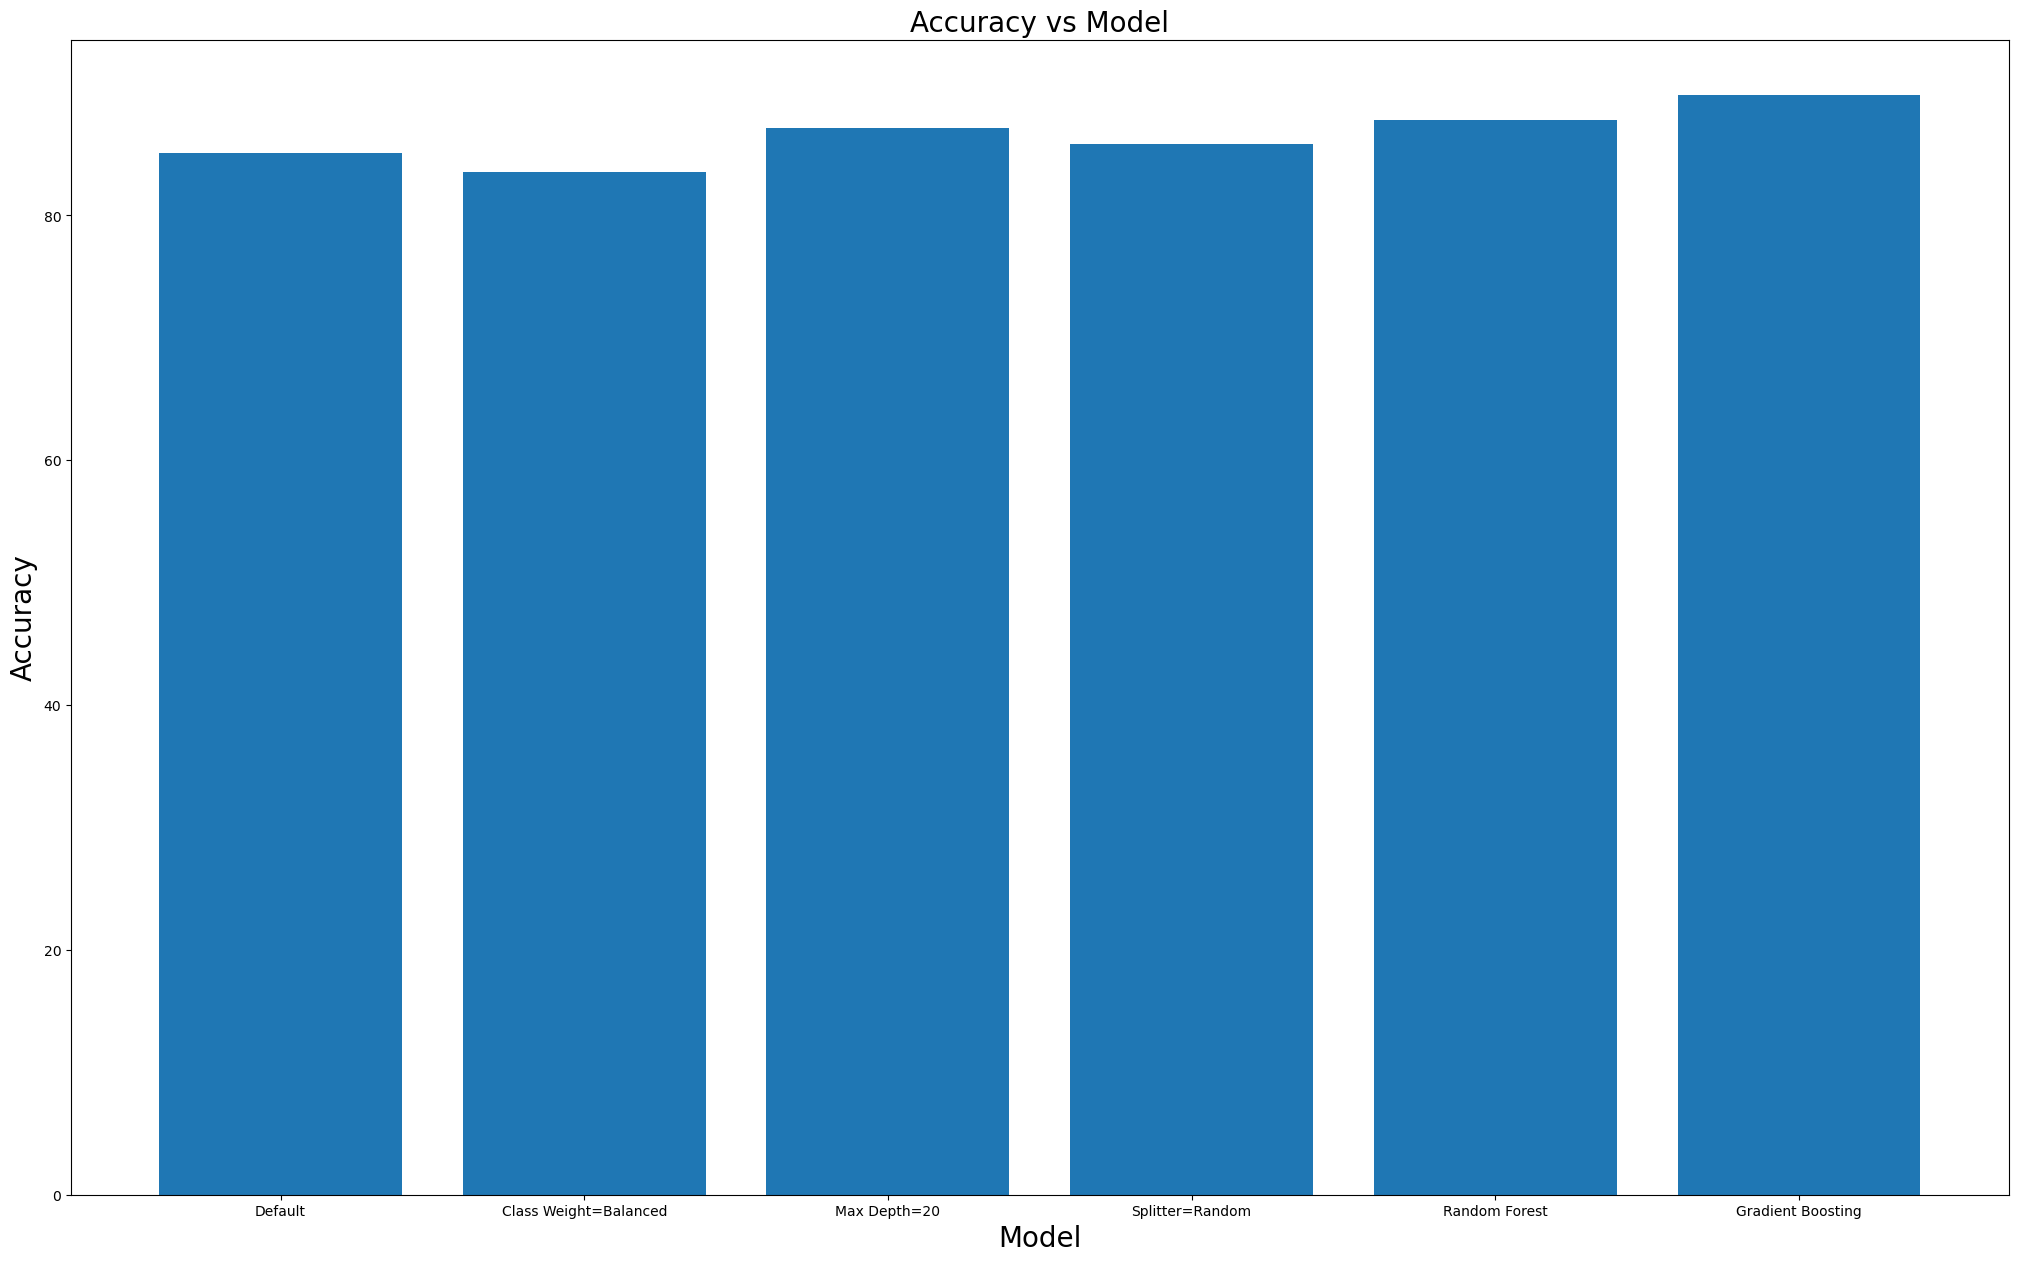

In [139]:
# Which model gives the best accuracy

Model = ['Default', 'Class Weight=Balanced', 'Max Depth=20', 'Splitter=Random', 'Random Forest', 'Gradient Boosting']
  
Accuracy = [accuracy_default, accuracy_cw, accuracy_md, accuracy_s, accuracy_rf, accuracy_gb]
  
list_of_tuples = list(zip(Model, Accuracy))

Model_accuracy = pd.DataFrame(list_of_tuples,
                  columns=['Model', 'Accuracy'])

Model_accuracy.head(6)

fig1 = plt.figure(figsize=(25,15))

plt.bar(data=Model_accuracy, x='Model', height='Accuracy',)

plt.title("Accuracy vs Model", fontsize=20)
plt.xlabel("Model", fontsize=20)

plt.ylabel("Accuracy", fontsize=20)


The above visualization represents the accuracy of each model. From the above visualization, it is clear that with gradient boosting model, we are getting the highest data accuracy and with decision tree model having class weight parameter as balanced, we are getting the least accuracy. 

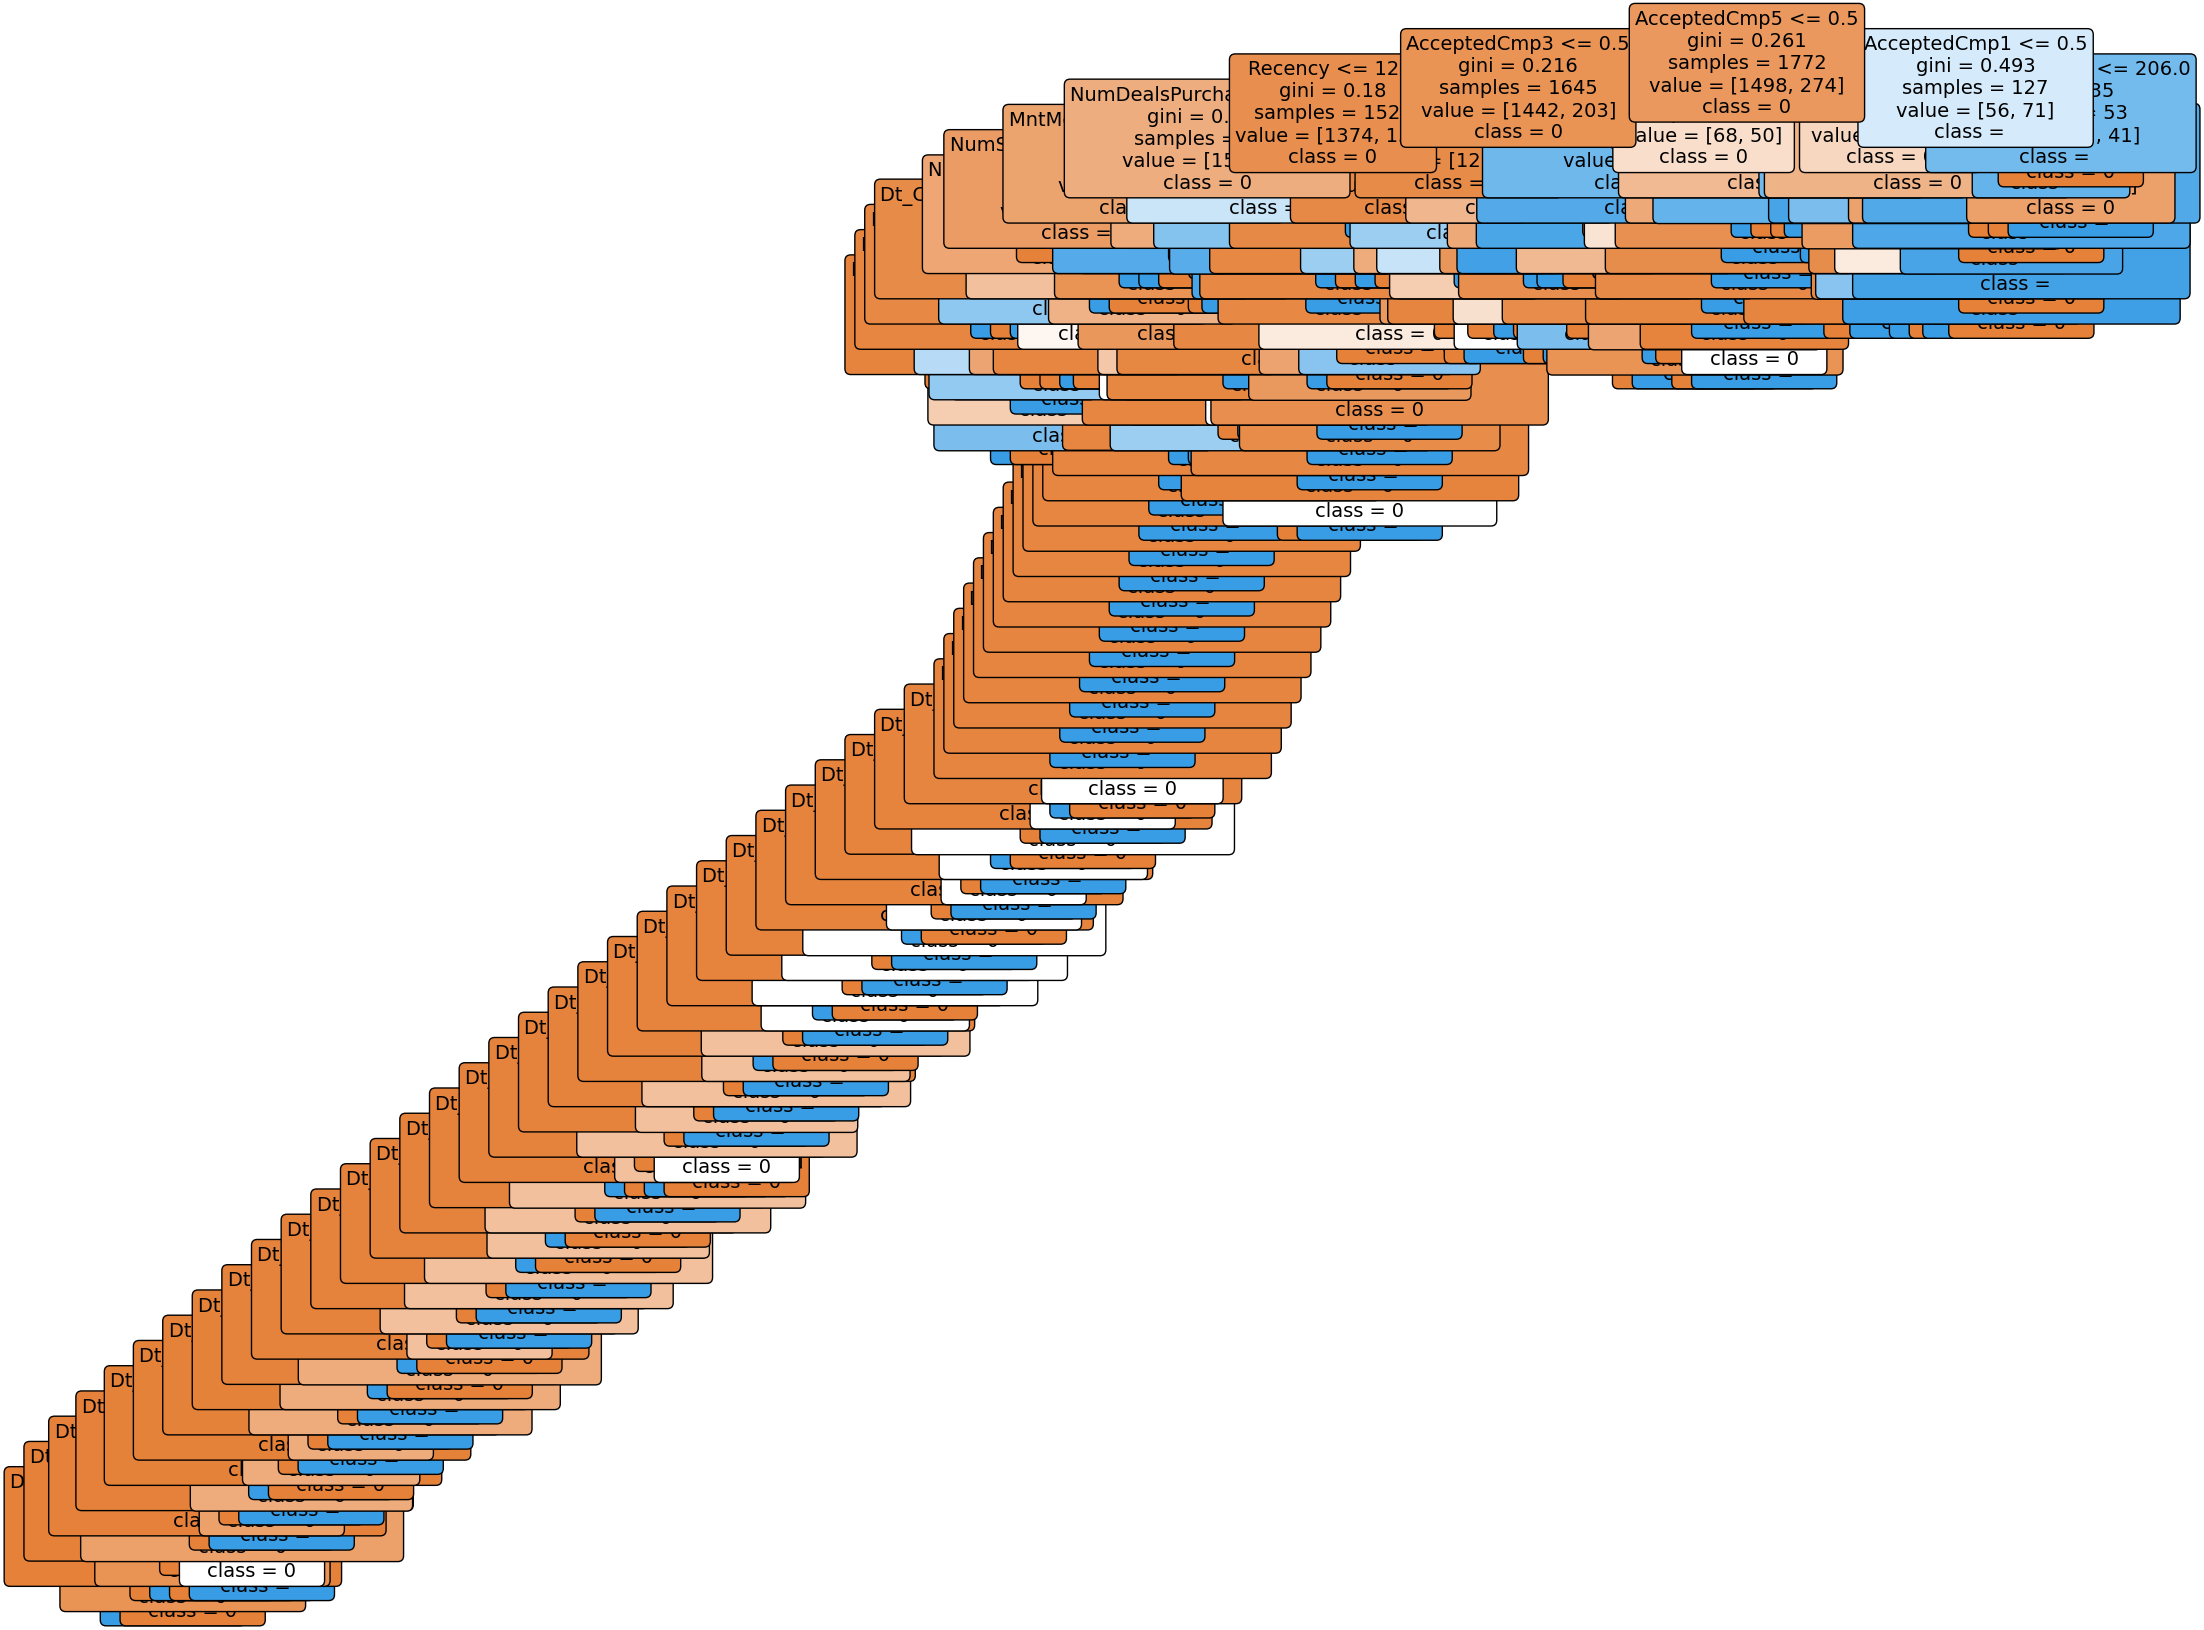

In [140]:
# Visualizing the decision tree
feature_names = marketing_campaign_df.columns[2:28]
target_names = marketing_campaign_df['Response']

fig1 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_default,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)

The above visualization represents the decision tree model that we have created. When interpreting a decision tree, one can follow the path from the root node to a particular leaf node to see how the decision is made for a particular instance. Along this path, each decision node corresponds to a feature and a threshold value, indicating the condition that the instance must meet to follow that branch. By examining the feature and threshold values along the path, one can understand how the decision tree algorithm has split the data based on different features and how the decision is ultimately made.

The root node, which in this case is the AcceptedCmp5 is the most important feature in prediction of response variable for the above model. It splits the dataset into subsets based on the value of that feature. AFter splitting, it checks for the next important features, which in this case is AcceptedCmp3 and AcceptedCmp. Based on these decision boundaries, the machine predicts the response variable of a particular input.

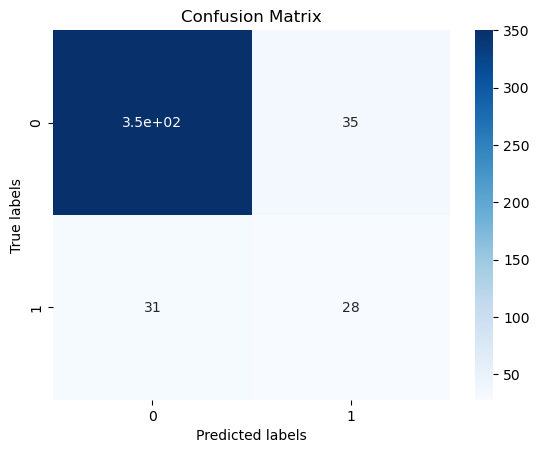

In [141]:
# Plot confusion matrix as heatmap
sns.heatmap(cm_default, annot=True, cmap="Blues")

# Add labels, title, and ticks
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], ["0", "1"])
plt.yticks([0.5, 1.5], ["0", "1"])
plt.show()

The top left corner represents true negatives (TN), which are the cases where the true label was negative and the model correctly predicted negative. The value 353 indicates that the model correctly predicted negative (0) in 353 cases.

The bottom right corner represents true positives (TP), which are the cases where the true label was positive and the model correctly predicted positive. The value 29indicates that the model correctly predicted positive (1) in 29 cases.

The top right corner represents the false positives (FP), which are the cases where the true label was negative but the model incorrectly predicted positive. The value 32 indicates that the model incorrectly predicted positive (1) in 32 cases.

The bottom left represent the false negatives (FN), which are the cases where the true label was positive but the model incorrectly predicted negative. The value 30, indicates that the model incorrectly predicted negative in 30 cases.

In summary, this confusion matrix suggests that the model had relatively high accuracy in predicting true negatives (353 out of 385), but had a high false positive rate (32 out of 61) and a high false negative rate (30 out of 59). The model correctly predicted true positives in only 29 out of 59 cases.

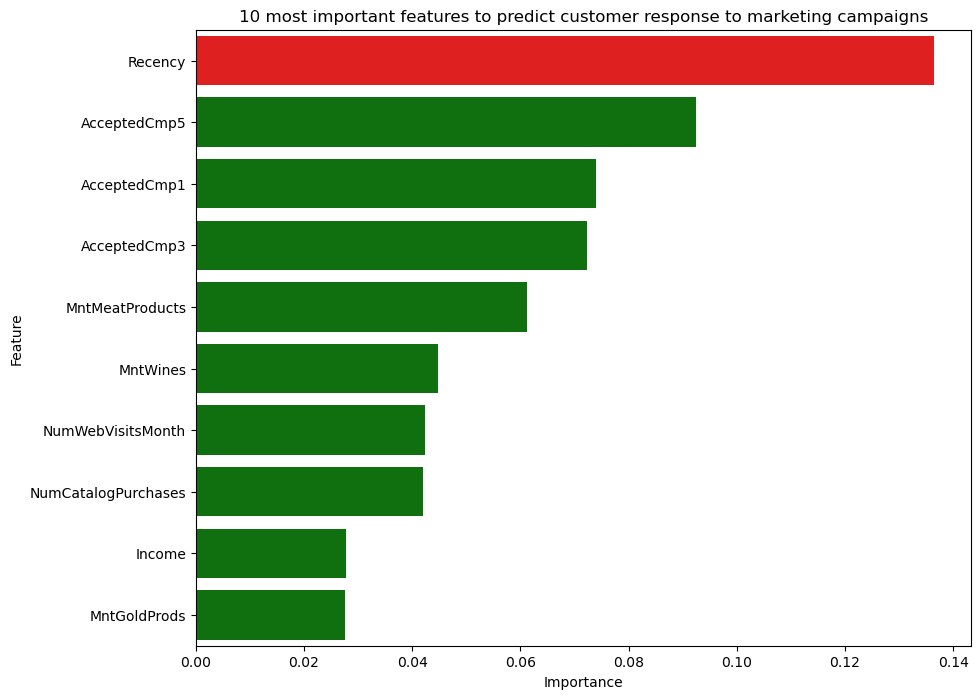

In [142]:
# Feature importance 
feat_dict_gb= {}
for col, val in sorted(zip(X_train.columns, clf_gb.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict_gb[col]=val

feat_df_gb = pd.DataFrame({'Feature':feat_dict_gb.keys(),'Importance':feat_dict_gb.values()})

top_10_feat_gb = feat_df_gb.head(10)


values_gb = top_10_feat_gb.Importance    
idx_gb = top_10_feat_gb.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values_gb)) else 'red' for x in values_gb ]
sns.barplot(y=idx_gb,x=values_gb,palette=clrs).set(title='10 most important features to predict customer response to marketing campaigns')
plt.show()

 A feature importance plot shows the relative importance of each feature in predicting the target variable in a machine learning model. The higher the value of the feature, the more important it is for the model to make accurate predictions.
 
From the feature importance plot, we can infer that recency - number of days since the last purchase - is the most important feature in the predicting the response of a customer. This makes sense, because if a customer has recently purched from a store, they will most likely not respond positively to the campaigns as they have already purchased all the products they need/want. 

Comparing this feature importance graph to previous feature importance graphs, we can see that some features are present in the top 10 features for all models such as Recency and MntMeatProducts with Recency being the most important feature in all. 

## Q8. What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? 

I encountered 2 key challeneges during the implementation:
    
    1. Missing values: There were null values in the dataset in the 'Income' column. I felt that income was an important feature in this dataset because people with less income might respond positively to advertising campaigns such as sales and offers. To prevent inaccuracies from being introduced in the model due to these null values, I dropped all rows containing null values. 
    
    2. Imbalances in data: Imbalanced datasets can be a challenge for decision tree algorithms, as they can lead to biased predictions. As shown above, the number of negative responses was 1883 and the number of positive response was 333. I used ensembling methods and class weights to reduce the impact of this imbalance on our model and accuracy. 
    
    3. Although the accuracy is good, precision and recall of our decision tree models was quite low for '1' and quite high for '0'. This can be due to the imbalance in the dataset. Thus, accuracy alone cannot be used to judge the 'goodness' of the model in this case. 
    
All these challenges were raised by the underlying dataset, and partly because of model. The basic Decision Tree Model was not the best fit for this dataset. However, random forest and gradient boosting improved the model. 

## Q9. We learned a little bit about how our models can affect real people in the world. Name 2 potential benefits of your model and 2 potential harms. You can even look at the Wikipedia page on Algorithmic BiasLinks to an external site. for inspiration. Every model has consequences, what can you think of? If your data is really not amenable to this question, simply write about any other example we covered in class, such as the Boston housing dataset or hate speech detectors.

For the Marketing Campaign dataset, two potential benefits of the model could be:

1. Improved targeting of marketing campaigns: By predicting which customers are most likely to respond positively to a campaign, businesses can focus their efforts and resources on those customers, potentially leading to higher conversion rates and increased profits.

2. Reduced costs and time: By using a decision tree model to identify the most important predictors of campaign success, businesses can streamline their marketing strategies and avoid wasting resources on ineffective approaches.

Two potential harms of the model could be:

1. Biased targeting: If the decision tree model is trained on biased data, it could result in unfair targeting of certain groups of customers. For example, if the data used to train the model includes more responses from female customers than male customers, the model may be biased towards targeting female customers more frequently.

2. Privacy concerns: The model may require access to sensitive customer data in order to make accurate predictions. If this data is mishandled or misused, it could lead to privacy violations and loss of trust from customers.

To tackle these issues, it is important to ensure that the training data is diverse and representative of the entire population, and to implement measures to protect the privacy of customer data. Additionally, ongoing monitoring and evaluation of the model's performance can help to identify and mitigate any biases.

## Q10. Name one research question you might ask next for future work (don't worry, you don't have to do it!) Why is it important?

One potential research question for future work could be: Could biases be good to certain extent in this case? Would they improve the model in any way? For instance if in real-world, more females positively respond to marketing campaigns than males, then wouldn't it be logical and beneficial for business to primarily target females? Similary, if teenagers are more likely to respond to marketing campaigns because they are naive and easily attracted to such schemes then shouldn't this implicit 'naiveness' be an important feature in making the prediction? 

Another potential research question for future work could be: Can we improve the performance of the decision tree model by using a different feature selection technique or by engineering new features? This is important because feature selection and feature engineering are key steps in building effective machine learning models, and it is possible that the current features used in the model may not be the most informative or relevant for predicting the target variable.